# Epileptic Seizure Recognition


## Idea- 
Depression is the major issue in this hectic life. We don't even know but we ourself could be depressed. If we go to a  psychiatrist(which will take a lot of hesitation)he'll ask some basic questions and decide on that basis and maybe some other basic preliminary tests, that's it. So, is that enough? Will that decide whether we are suffering from depression or not?

Epileptic Seizure Recognition will help us in finding out whether that person is depressed or not based on some basic eeg tests which could easily be conducted. My model has an accuracy of 96.2898550725% which is a very good accuracy.
Well, this model is majorly made (as you can see from the name) for brain epileptic seizure which could be really devastating. We can find it out in its early stage and could really save a life.

What is brain epileptic seizure?
https://en.wikipedia.org/wiki/Epileptic_seizure 

How bad is it?
Do watch this video in order to sense how important this issue is..(skip to 38 sec)
https://www.youtube.com/watch?v=MRZY2a2jnuw


Link of the dataset(UCI Repository)
https://archive.ics.uci.edu/ml/datasets/Epileptic+Seizure+Recognition

#this whole information have been copy pasted from the UCI repository(link above)

About the dataset--

We divided and shuffled every 4097 data points into 23 chunks, each chunk contains 178 data points for 1 second, and each data point is the value of the EEG recording at a different point in time. So now we have 23 x 500 = 11500 pieces of information(row), each information contains 178 data points for 1 second(column), the last column represents the label y {1,2,3,4,5}. 


y contains the category of the 178-dimensional input vector. Specifically y in {1, 2, 3, 4, 5}: 

5 - eyes open, means when they were recording the EEG signal of the brain the patient had their eyes open 

4 - eyes closed, means when they were recording the EEG signal the patient had their eyes closed 

3 - Yes they identify where the region of the tumor was in the brain and recording the EEG activity from the healthy brain area 

2 - They recorder the EEG from the area where the tumor was located 

1 - Recording of seizure activity

from sklearn.ensemble import RandomForestClassifier as rfc
x_train, x_test, y_train, y_test =tts(x1, y, test_size=0.3, random_state=42)
clf_rf=rfc(random_state=43)
clr_rf = clf_rf.fit(x_train,y_train)
print(clf_rf.score(x_test,y_test))
p1 = int(input('enter the 11th signal\n'))
p2 = int(input('enter the 31st signal\n'))
p3 = int(input('enter the 53th signal\n'))
p4 = int(input('enter the 157th signal\n'))
p5 = int(input('enter the 159th signal\n'))
p6=[p1,p2,p3,p4,p5]
predict=clf_rf.predict([p6])

if predict==0:
    print("you do not have brain epileptical seizure")
if predict==1:
    print('you are suffering from brain epilepsy')

In [1]:
#importing the required libraries
import pandas as pd
import numpy as np

#loading the data
x=pd.read_csv('F:/Study/eegr.csv',header=0,index_col=None)

#shape of the data and first 5 data
print('shape is--',x.shape,'\n')
print('Feature table below')
x.head()

shape is-- (11500, 180) 

Feature table below


,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


##That's a lot of features, before we get into any model fitting, our main interest would be on feature elimination.

In [2]:
#getting the basic information about the dataset and then searching for any null values
print(x.info())
x.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 180 entries, Unnamed: 0 to y
dtypes: int64(179), object(1)
memory usage: 15.8+ MB
None


Unnamed: 0    0
X1            0
X2            0
X3            0
X4            0
X5            0
X6            0
X7            0
X8            0
X9            0
X10           0
X11           0
X12           0
X13           0
X14           0
X15           0
X16           0
X17           0
X18           0
X19           0
X20           0
X21           0
X22           0
X23           0
X24           0
X25           0
X26           0
X27           0
X28           0
X29           0
             ..
X150          0
X151          0
X152          0
X153          0
X154          0
X155          0
X156          0
X157          0
X158          0
X159          0
X160          0
X161          0
X162          0
X163          0
X164          0
X165          0
X166          0
X167          0
X168          0
X169          0
X170          0
X171          0
X172          0
X173          0
X174          0
X175          0
X176          0
X177          0
X178          0
y             0
Length: 180, dtype: int6

Gladly there isn't any null values here, so let's move on

In [3]:
# quite evidently the first column is of no use so we'll remove it
x=x.drop(['Unnamed: 0'],axis=1)

#getting the basic information about the dataset
x.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,3.000000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,1.414275
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,1.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000,2.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,3.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,34.000000,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,4.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,5.000000


Quite clearly, these data have heavy linear colinearity

counts of y
y1-- 2300 
 y2-- 2300 
 y3-- 2300 
 y4-- 2300 
 y5-- 2300
max of y is- 5 
 min of y is- 1 

plotting


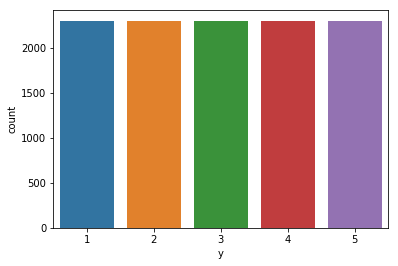

In [4]:
#importing the libraries for plotting purposes
import seaborn as sns
import matplotlib.pyplot as plt

#plotting the values for each variable output
%matplotlib inline
s=sns.countplot(x.y,label='count')

#counting the output y 
y1,y2,y3,y4,y5 = x.y.value_counts()
print('counts of y')
print('y1--',y1,'\n','y2--',y2,'\n','y3--',y3,'\n','y4--',y4,'\n','y5--',y5)

#cleary there 1 is minimum and maximum is 5 in the output y
print('max of y is-',max(x.y),'\n','min of y is-',min(x.y),'\n')

print('plotting')

In [5]:
'''In the dataset it was clearly mentioned that the values of 1 is recording of seizure activity so,we replace all that with 0'''
x['y'] = x['y'].replace([5], [0]).ravel()
x['y'] = x['y'].replace([4], [0]).ravel()
x['y'] = x['y'].replace([3], [0]).ravel()
x['y'] = x['y'].replace([2], [0]).ravel()

In [6]:
#in X we place the features and in y we place output  
X =x.iloc[:, 1:177].values
y = x.iloc[:, 178].values

In [7]:
#we saw in the previous codes that the features have heavy linear colinearity, let's dive deep into that and fix it
x.corr()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
X1,1.000000,0.947729,0.808192,0.608109,0.393674,0.218226,0.103693,0.044483,0.027923,0.032221,...,0.027263,0.045401,0.051630,0.049604,0.042967,0.036144,0.030581,0.024562,0.020022,-0.031262
X2,0.947729,1.000000,0.944623,0.790403,0.576579,0.369803,0.211793,0.109478,0.060218,0.043565,...,0.012602,0.025937,0.031606,0.030452,0.025975,0.024290,0.023906,0.021962,0.018059,-0.024503
X3,0.808192,0.944623,1.000000,0.939522,0.778648,0.573874,0.382493,0.231084,0.133249,0.080003,...,0.004575,0.011752,0.016424,0.017070,0.014837,0.015536,0.016982,0.017070,0.012419,-0.015615
X4,0.608109,0.790403,0.939522,1.000000,0.938636,0.784954,0.590497,0.399855,0.250052,0.150284,...,-0.001028,0.000632,0.006617,0.011882,0.014496,0.016992,0.016911,0.014671,0.006226,-0.002149
X5,0.393674,0.576579,0.778648,0.938636,1.000000,0.941267,0.792304,0.596424,0.410651,0.265112,...,0.004861,0.000918,0.006488,0.013946,0.019146,0.021924,0.018869,0.013607,0.001298,0.013362
X6,0.218226,0.369803,0.573874,0.784954,0.941267,1.000000,0.942732,0.794265,0.607889,0.429895,...,0.017472,0.006843,0.007527,0.012335,0.017871,0.022444,0.020977,0.017383,0.004240,0.030168
X7,0.103693,0.211793,0.382493,0.590497,0.792304,0.942732,1.000000,0.943499,0.804300,0.624709,...,0.034436,0.017263,0.008576,0.005324,0.008200,0.014869,0.017016,0.018572,0.008325,0.041501
X8,0.044483,0.109478,0.231084,0.399855,0.596424,0.794265,0.943499,1.000000,0.947479,0.810992,...,0.042858,0.021655,0.004421,-0.007815,-0.008532,-0.000510,0.005851,0.012590,0.008032,0.043528
X9,0.027923,0.060218,0.133249,0.250052,0.410651,0.607889,0.804300,0.947479,1.000000,0.946729,...,0.043747,0.020409,-0.003408,-0.022253,-0.026821,-0.018552,-0.009052,0.001943,0.004823,0.046100
X10,0.032221,0.043565,0.080003,0.150284,0.265112,0.429895,0.624709,0.810992,0.946729,1.000000,...,0.036025,0.012609,-0.015201,-0.036875,-0.043265,-0.036517,-0.025522,-0.011809,-0.001332,0.052803


Okay so, there is some serious co-linearity. If we see more closely then we'll find out that every preceeding feature is linear to the next feature. This is true in the entire dataset

In [8]:
#we will delete every odd features as we don't need them and it could produce noise in the model
#storing these features in a list and then we'll delete the list
list=[]
for i in range(1,178,2):
    list.append(x.columns[i])
print(list)


['X2', 'X4', 'X6', 'X8', 'X10', 'X12', 'X14', 'X16', 'X18', 'X20', 'X22', 'X24', 'X26', 'X28', 'X30', 'X32', 'X34', 'X36', 'X38', 'X40', 'X42', 'X44', 'X46', 'X48', 'X50', 'X52', 'X54', 'X56', 'X58', 'X60', 'X62', 'X64', 'X66', 'X68', 'X70', 'X72', 'X74', 'X76', 'X78', 'X80', 'X82', 'X84', 'X86', 'X88', 'X90', 'X92', 'X94', 'X96', 'X98', 'X100', 'X102', 'X104', 'X106', 'X108', 'X110', 'X112', 'X114', 'X116', 'X118', 'X120', 'X122', 'X124', 'X126', 'X128', 'X130', 'X132', 'X134', 'X136', 'X138', 'X140', 'X142', 'X144', 'X146', 'X148', 'X150', 'X152', 'X154', 'X156', 'X158', 'X160', 'X162', 'X164', 'X166', 'X168', 'X170', 'X172', 'X174', 'X176', 'X178']


In [9]:
#droping the list now
x=x.drop(list,axis=1)

In [10]:
#storing the values of y in x and then dropping it
y=x.y
list1=['y']
x=x.drop(list1,axis=1)

In [11]:
#let's have a look at the current first 5 data
x.head()

,X1,X3,X5,X7,X9,X11,X13,X15,X17,X19,...,X159,X161,X163,X165,X167,X169,X171,X173,X175,X177
0,135,229,192,55,-33,-10,64,152,127,-47,...,-79,-85,-98,-65,-11,8,-15,-77,-127,-83
1,386,356,320,307,244,237,212,-267,-850,-1109,...,69,123,127,95,131,168,150,152,156,143
2,-32,-47,-32,-57,-85,-99,-96,-103,-75,-69,...,66,-11,-44,-45,-42,29,64,19,-30,-35
3,-105,-96,-89,-102,-87,-72,-74,-83,-68,-58,...,-22,-42,-68,-69,-74,-80,-81,-77,-77,-69
4,-9,-98,-78,-16,-21,-90,-84,-9,-21,-96,...,3,-2,18,27,15,10,2,-32,-65,-89


In [12]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.3, random_state = 0)

In [13]:
#doing the min max scaling (it scales the value between 0 and 1)
from sklearn import preprocessing

minmax_scale = preprocessing.MinMaxScaler().fit(x)
xs= minmax_scale.transform(x)
print(type(xs),type(x))
xs = pd.DataFrame(xs)
type(xs)

<class 'numpy.ndarray'> <class 'pandas.core.frame.DataFrame'>


pandas.core.frame.DataFrame

In [14]:
from sklearn.ensemble import RandomForestClassifier as rfc
x_train, x_test, y_train, y_test =tts(xs, y, test_size=0.3, random_state=42)
clf_rf=rfc(random_state=43)
clr_rf = clf_rf.fit(x_train,y_train)
print(x.shape)
'''with 89 features we get the acuuracy-- but then 89 features are a lot,
we'll try to reduce it and see how well we can fit our model '''
clf_rf.score(x_test,y_test)

(11500, 89)


0.96405797101449275

In [15]:
from sklearn.ensemble import RandomForestClassifier as rfc
x_train, x_test, y_train, y_test =tts(x, y, test_size=0.3, random_state=42)
clf_rf=rfc(random_state=43)
clr_rf = clf_rf.fit(x_train,y_train)
print(x.shape)
'''with 89 features we get the acuuracy-- but then 89 features are a lot,
we'll try to reduce it and see how well we can fit our model '''
clf_rf.score(x_test,y_test)

(11500, 89)


0.96405797101449275

Hence, scalling does not help much, so we'll restrict ourself from scalling 

Feature ranking:
1. feature 78 (0.075316)
2. feature 56 (0.060290)
3. feature 19 (0.055595)
4. feature 79 (0.050965)
5. feature 80 (0.050407)
6. feature 6 (0.043495)
7. feature 45 (0.036227)
8. feature 20 (0.024462)
9. feature 22 (0.023920)
10. feature 9 (0.023822)
11. feature 70 (0.023299)
12. feature 21 (0.022397)
13. feature 8 (0.020671)
14. feature 63 (0.020156)
15. feature 28 (0.019427)
16. feature 17 (0.018967)
17. feature 87 (0.017759)
18. feature 46 (0.017130)
19. feature 23 (0.015553)
20. feature 37 (0.015026)
21. feature 60 (0.013240)
22. feature 64 (0.012990)
23. feature 42 (0.012530)
24. feature 29 (0.011950)
25. feature 62 (0.010775)
26. feature 33 (0.010706)
27. feature 53 (0.010465)
28. feature 71 (0.009125)
29. feature 48 (0.008766)
30. feature 69 (0.008643)
31. feature 11 (0.007334)
32. feature 16 (0.007166)
33. feature 30 (0.007140)
34. feature 82 (0.006985)
35. feature 12 (0.006883)
36. feature 77 (0.006872)
37. feature 35 (0.006559)
38. feature 75 (0.006377)
39. fea

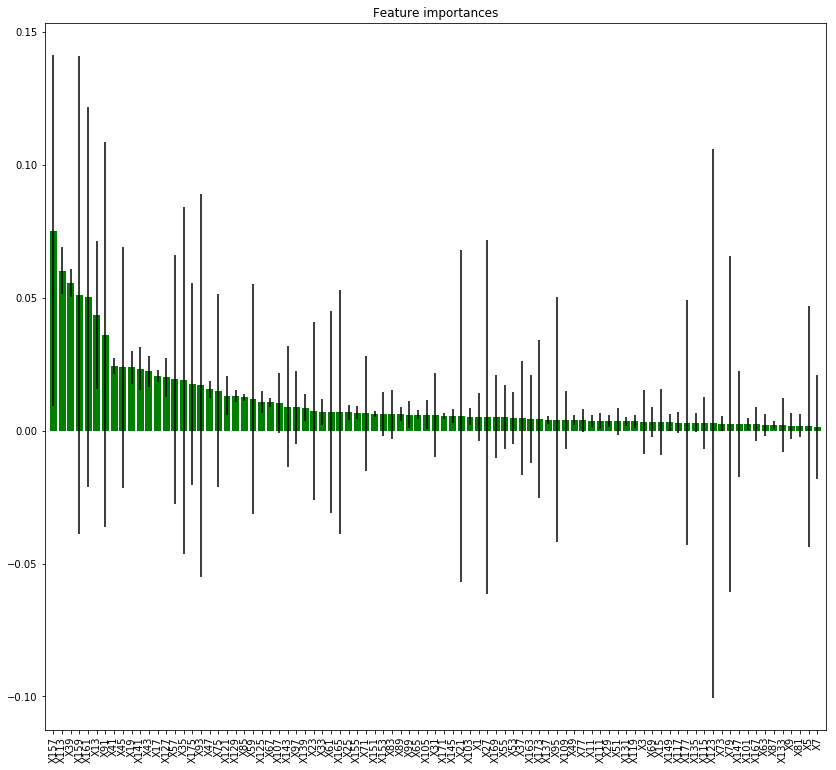

In [16]:
#applying pca
clf_rf_1 = rfc()      
clr_rf_1 = clf_rf_1.fit(x_train,y_train)
importances = clr_rf_1.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()

In [17]:
list_a=[]
a=0

for f in range(25,x_train.shape[1]):
    i=indices[f]
    print(x.columns[i])
    list_a=list_a+[x.columns[i]]
    a+=1
print('this is list_a',list_a)

X67
X107
X143
X97
X139
X23
X33
X61
X165
X25
X155
X71
X151
X153
X83
X89
X99
X65
X105
X31
X171
X145
X21
X103
X1
X27
X169
X55
X53
X37
X163
X173
X137
X95
X109
X49
X77
X11
X111
X29
X51
X131
X119
X3
X69
X15
X149
X117
X177
X135
X115
X123
X73
X79
X147
X101
X167
X63
X87
X133
X9
X81
X5
X7
this is list_a ['X67', 'X107', 'X143', 'X97', 'X139', 'X23', 'X33', 'X61', 'X165', 'X25', 'X155', 'X71', 'X151', 'X153', 'X83', 'X89', 'X99', 'X65', 'X105', 'X31', 'X171', 'X145', 'X21', 'X103', 'X1', 'X27', 'X169', 'X55', 'X53', 'X37', 'X163', 'X173', 'X137', 'X95', 'X109', 'X49', 'X77', 'X11', 'X111', 'X29', 'X51', 'X131', 'X119', 'X3', 'X69', 'X15', 'X149', 'X117', 'X177', 'X135', 'X115', 'X123', 'X73', 'X79', 'X147', 'X101', 'X167', 'X63', 'X87', 'X133', 'X9', 'X81', 'X5', 'X7']


In [18]:
#removing columns which give no infprmation about the data and the output column is stored at another place 
x1 = x.drop(list_a,axis = 1 )
x1.head()

,X13,X17,X19,X35,X39,X41,X43,X45,X47,X57,...,X113,X121,X125,X127,X129,X141,X157,X159,X161,X175
0,64,127,-47,-130,-71,25,6,21,-37,41,...,-34,66,56,-11,-43,90,-83,-79,-85,-127
1,212,-850,-1109,326,310,309,303,295,293,169,...,-206,-460,-210,-930,-1716,146,63,69,123,156
2,-96,-75,-69,7,6,-30,-53,-64,-85,11,...,-110,-89,-90,-106,-87,-107,62,66,-11,-30
3,-74,-68,-58,-69,-68,-67,-58,-56,-80,-89,...,-60,-73,-92,-88,-72,-66,-64,-22,-42,-77
4,-84,-21,-96,-19,-20,16,-14,-56,-45,0,...,38,-1,17,-17,26,26,9,3,-2,-65


In [19]:
#for practical purposes we are using only 5 features

In [20]:
from sklearn.ensemble import RandomForestClassifier as rfc
x_train, x_test, y_train, y_test =tts(x1, y, test_size=0.3, random_state=42)
clf_rf=rfc(random_state=43)
clr_rf = clf_rf.fit(x_train,y_train)
print(clf_rf.score(x_test,y_test))


0.962898550725


## So, we got 0.962898550725 accuracy with some basic operations.